# Assignment 4.2 - ( 3.1, 3.2, 4.1, 4.2)

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

## Exercise 3-1

In [1]:
import nsfg
import first
import thinkstats2
import thinkplot
import numpy as np
import random

In [2]:
def bias_pmf(pmf, label):
    """calculates bias_pmf given actual_pmf"""
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf

In [12]:
def main():
    resp = nsfg.ReadFemResp()
    # calculates actual distribution of number of children under 18
    actual_pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')
    # calculates biased distribution of number of children under 18
    biased_pmf = bias_pmf(actual_pmf, 'observed')
    # plots pmf's
    thinkplot.PrePlot(2)
    thinkplot.Pmfs([actual_pmf, biased_pmf])
    thinkplot.Show(xlabel = '# of Children Under 18', ylabel = 'PMF')
    # compares means between the two
    print("Actual mean ", actual_pmf.Mean())
    print("Observed mean ", biased_pmf.Mean())

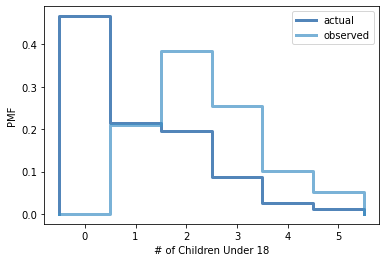

Actual mean  1.024205155043831
Observed mean  2.403679100664282


<Figure size 576x432 with 0 Axes>

In [13]:
if __name__ == '__main__':
    main()

## Exercise 3-2

In [5]:
def pmf_mean(pmf):
    """calculates mean of pmf"""
    mean = 0.0
    for x, p in pmf.Items():
        mean += x * p
    return mean

In [6]:
def pmf_var(pmf):
    """calculates var of pmf"""
    var = 0.0
    mean = pmf_mean(pmf)
    for x, p in pmf.Items():
        var += p * ((x - mean) ** 2)
    return var

In [16]:
def main():
    d = { 7: 8, 12: 8, 17: 14, 22: 4,
         27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
    # creates pmf
    pmf = thinkstats2.Pmf(d, label='actual')
    # computes mean, both new function and provided function and compares
    print(f"Provided mean function: {pmf.Mean()}")
    print(f"New mean function: {pmf_mean(pmf)}")
    print(f"Provided variance function: {pmf.Var()}")
    print(f"New variance function: {pmf_var(pmf)}")

In [17]:
if __name__ == '__main__':
    main()

Provided mean function: 23.692307692307693
New mean function: 23.692307692307693
Provided variance function: 128.67455621301775
New variance function: 128.67455621301775


## Exercise 4-1

In [9]:
live, firsts, others = first.MakeFrames()
cdf_live = thinkstats2.Cdf(live.totalwgt_lb, label = 'totalwgt_lb')
cdf_others = thinkstats2.Cdf(others.totalwgt_lb, label = 'totalwgt_lb')
# calculates percentile weight of live births
stewart_percentile = cdf_live.PercentileRank(8)
#calculates percentile weight of other births
stewart_percentile_others = cdf_others.PercentileRank(8)
print(stewart_percentile)
print(stewart_percentile_others)

73.32374419119274
71.12299465240642


## Exercise 4-2

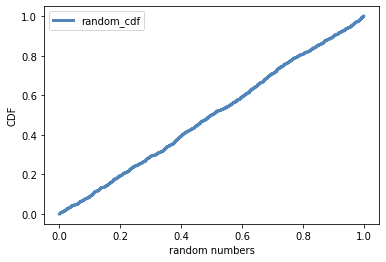

AttributeError: 'list' object has no attribute 'Render'

<Figure size 576x432 with 0 Axes>

In [22]:
ran_nums = np.random.random(1000)
# PMF of random numbers
ran_pmf = thinkstats2.Pmf(ran_nums, label='random_pmf')
# CDF of random numbers
ran_cdf = thinkstats2.Cdf(ran_nums, label='random_cdf')
# plots CDF and PMF
thinkplot.PrePlot(1)
thinkplot.Cdfs([ran_cdf])
thinkplot.Show(xlabel = 'random numbers', ylabel = 'CDF')
thinkplot.PrePlot(1)
thinkplot.Pmf([ran_pmf])
thinkplot.Show(xlabel = 'random numbers', ylabel = 'PMF')
# it is a uniform distribution